## Adagrad
- Momentum and Nesterov Momentum need a fixed Learning Rate that doesnt change during gradient descent
- Adagrad adapts the learning rate to parameters and performs smaller updates for parameters with frequently occuring features and bigger updates for infrequent features
- intuition: steep slope require smaller but frequent updates while low slops need to make bigger jumps
- **well suited for sparse data**
- previously an update for all parameters was performed using the same learning rate
- update role for each individual parameter $i$ $w_{i,t} = w_{i,t-1} -\eta * \nabla_w L(w_{i,t}) $
- based on the past squared gradients $G$ the previous formula is adapted to $ w_{i,t} = w_{i,t-1} -\frac{\eta}{\sqrt{G_{ii,t}+epsilon}} * \nabla_w L(w_{i,t})$
- vectorized formula $w_{t} = w_{t-1} -\frac{\eta}{\sqrt{G_{t}+epsilon}} \odot \nabla_w L(w_{t})$
- bif disadvantage is that the learning rate eventually becomes so small that the algorithm is no longer able to find a better solution 



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline


In [4]:
def f(x):
    
    return -x*np.sin(x)
def df(f,x,eps=1e-9):
    return (f(x+eps)-f(x-eps))/ (2*eps)

def plot(f,x_min=-1,x_max=1):
    x = np.linspace(x_min,x_max,100)
    plt.plot(x,f(np.array(x)))
def plot_gradients(x,f,label):
    plt.scatter(x,f(np.array(x)),label=label)
    for i,xi in enumerate(x):
        plt.annotate(f"x{i}",(xi,f(xi)),(xi,f(xi)+0.15))

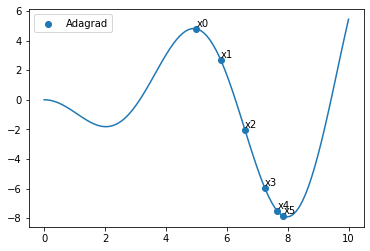

In [22]:
EPOCHS = 5
w = 5

gradients = [w]

learning_rate = 0.8
G=0

for epoch in range(EPOCHS):
    g = df(f,w)
    G += g**2
    w -= (learning_rate/np.sqrt(G+1e-8)) * g
   
    gradients.append(w)
plot(f,0,10)
plot_gradients(gradients,f,"Adagrad")

plt.legend()


In [23]:
with open("sgd_adagrad.pkl","wb") as f:
    pickle.dump(gradients,f)